In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('data/train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
X = titanic[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
y = titanic['Survived']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [6]:
#X_train.dropna(inplace=True)

In [7]:
X_train.Embarked.fillna('S');

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 6 columns):
Pclass      668 non-null int64
Sex         668 non-null object
SibSp       668 non-null int64
Parch       668 non-null int64
Fare        668 non-null float64
Embarked    666 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 36.5+ KB


In [9]:
X_train.describe()

,Pclass,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,668.000000
mean,2.333832,0.553892,0.372754,32.179397
std,0.823707,1.185279,0.795588,51.604012
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.925000
50%,3.000000,0.000000,0.000000,14.400000
75%,3.000000,1.000000,0.000000,30.500000
max,3.000000,8.000000,6.000000,512.329200


In [10]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x1a1274fcf8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a12760748>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1276d400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a12760f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1274fe48>,
  <matplotlib.lines.Line2D at 0x1a12760320>]}

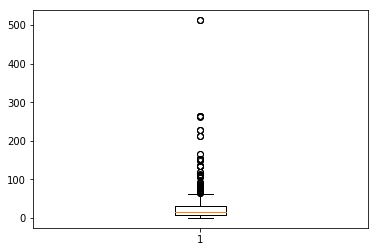

In [11]:
plt.boxplot(X_train.Fare)

In [12]:
X_train.Fare.quantile(0.99)

262.58125

In [13]:
# Drop 1% outliers
#X_train = X_train[X_train.Fare < 228]
#y_train 

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 6 columns):
Pclass      668 non-null int64
Sex         668 non-null object
SibSp       668 non-null int64
Parch       668 non-null int64
Fare        668 non-null float64
Embarked    666 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 36.5+ KB


In [15]:
X_train.Sex.head()

298      male
884      male
247    female
478      male
305      male
Name: Sex, dtype: object

In [16]:
X_train.Sex = X_train.Sex.map({'female':1, 'male':0})

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
298,1,0,0,0,30.5000,S
884,3,0,0,0,7.0500,S
247,2,1,0,2,14.5000,S
478,3,0,0,0,7.5208,S
305,1,0,1,2,151.5500,S


In [18]:
embarked = pd.get_dummies(X_train.Embarked, prefix='Embarked',drop_first=True)

In [19]:
X_train = X_train.join(embarked);
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
298,1,0,0,0,30.5000,S,0,1
884,3,0,0,0,7.0500,S,0,1
247,2,1,0,2,14.5000,S,0,1
478,3,0,0,0,7.5208,S,0,1
305,1,0,1,2,151.5500,S,0,1


In [20]:
import seaborn as sns

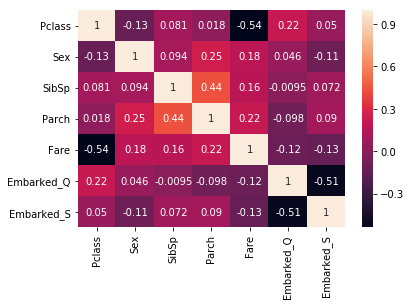

In [21]:
sns.heatmap(X_train.corr(), annot=True)

In [22]:
#Since there is correlation between Parch and SibSp lets combine it into one Family variable

In [23]:
X_train['Family'] = X_train['SibSp'] + X_train['Parch']

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler(copy=False)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 9 columns):
Pclass        668 non-null int64
Sex           668 non-null int64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked      666 non-null object
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Family        668 non-null int64
dtypes: float64(1), int64(5), object(1), uint8(2)
memory usage: 63.1+ KB


In [26]:
X_train_filtered = X_train[['Pclass','Sex','Family','Fare', 'Embarked_S','Embarked_Q']]

In [27]:
columns = X_train_filtered.columns
X_train_filtered_std = ss.fit_transform(X_train_filtered[[name for name in columns]])

In [28]:
pd.DataFrame(X_train_filtered_std).head()

,0,1,2,3,4,5
0,-1.620517,-0.722247,-0.547805,-0.032568,0.600407,-0.308354
1,0.809349,-0.722247,-0.547805,-0.487331,0.600407,-0.308354
2,-0.405584,1.384569,0.634533,-0.342854,0.600407,-0.308354
3,0.809349,-0.722247,-0.547805,-0.478201,0.600407,-0.308354
4,-1.620517,-0.722247,1.225703,2.314937,0.600407,-0.308354


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lgr = LogisticRegression()

In [31]:
param_grid = [
    {'C': [C for C in [0.01, 0.1, 1, 10] ]  } ]

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid = GridSearchCV(lgr, param_grid, cv = 5)

In [34]:
grid.fit(pd.DataFrame(X_train_filtered_std), y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [35]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
X_test.Embarked.fillna('S');

In [37]:
X_test.Sex = X_test.Sex.map({'female':1, 'male':0})

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
embarked_test = pd.get_dummies(X_test.Embarked, prefix='Embarked',drop_first=True)

In [39]:
X_test = X_test.join(embarked_test);

In [40]:
X_test['Family'] = X_test['SibSp'] + X_test['Parch']

In [41]:
X_test_filtered = X_test[['Pclass','Sex','Family','Fare', 'Embarked_S','Embarked_Q']]

In [42]:
X_test_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 6 columns):
Pclass        223 non-null int64
Sex           223 non-null int64
Family        223 non-null int64
Fare          223 non-null float64
Embarked_S    223 non-null uint8
Embarked_Q    223 non-null uint8
dtypes: float64(1), int64(3), uint8(2)
memory usage: 19.1 KB


In [43]:
X_test_filtered_std = ss.transform(X_test_filtered[[name for name in columns]])

In [44]:
grid.score(X_test_filtered_std, y_test)

0.7668161434977578

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
predictions = grid.predict(X_test_filtered_std)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.79      0.80       134
          1       0.70      0.73      0.71        89

avg / total       0.77      0.77      0.77       223



In [47]:
confusion_matrix(y_test, predictions)


array([[106,  28],
       [ 24,  65]])

In [50]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
import numpy as np

Text(0,0.5,'Recall')

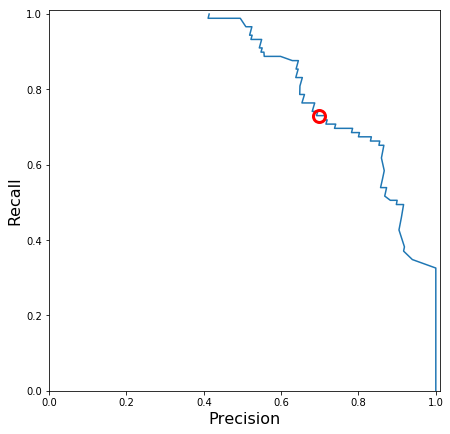

In [51]:
y_scores_lr = grid.fit(X_train_filtered_std, y_train).decision_function(X_test_filtered_std)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

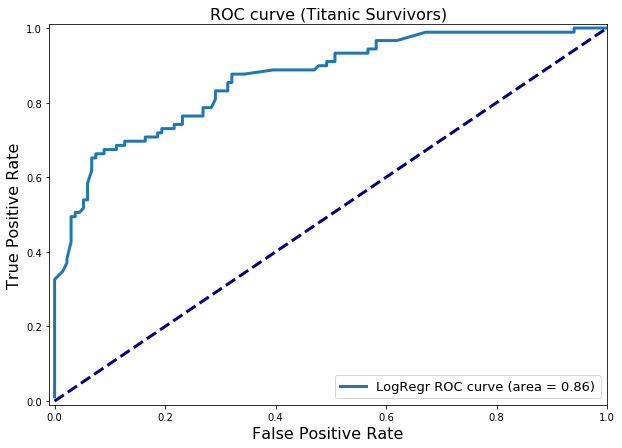

In [52]:
y_score_lr = lgr.fit(X_train_filtered_std, y_train).decision_function(X_test_filtered_std)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Titanic Survivors)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')